## Introduction
The aim of this project is to develop and implement machine learning algorithms to accurately detect fraudulent activities and anomalies within financial or transactional data. By leveraging advanced techniques in supervised and unsupervised learning, the system is designed to identify patterns and outliers that may indicate fraudulent behavior. This solution will help mitigate risks, enhance security, and provide early detection of potential threats, ultimately safeguarding organizational assets and improving decision-making processes. The project focuses on optimizing model accuracy, ensuring real-time detection, and minimizing false positives to protect both businesses and customers.

### Important information
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\tevin\OneDrive\Documents\Anomaly\Anomaly-Detection\creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.duplicated().sum()

1081

In [7]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## EDA

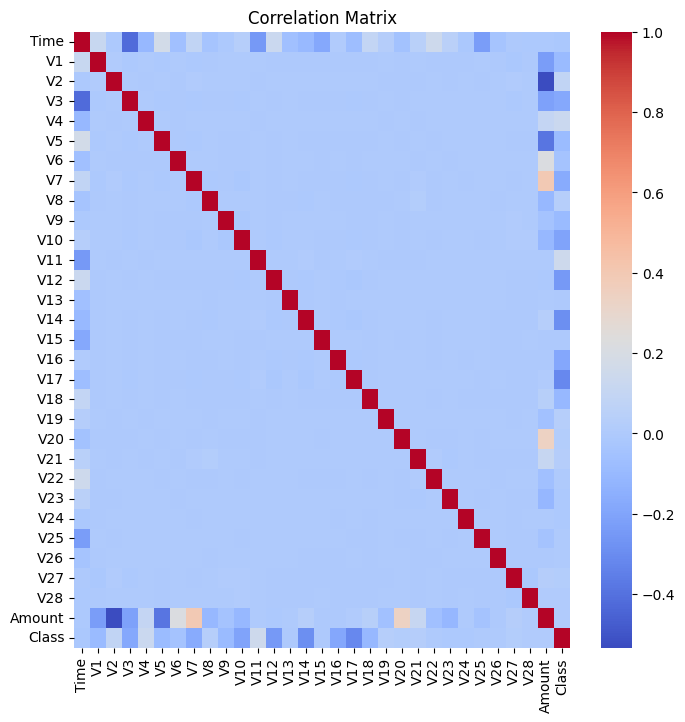

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

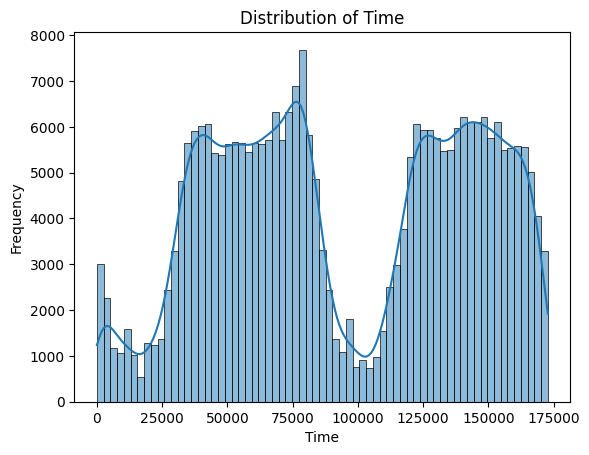

In [10]:
# plot of distribution of time

sns.histplot(data=df, x=df['Time'], kde=True)
plt.title("Distribution of Time")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

There are three distinct peaks in the time distribution, suggesting three main periods of high transaction activity.
The frequency pattern shows cyclical behavior.
The valleys between peaks drop to around 100 thousand seconds since transacrtion, while peaks reach 70,5000 and 150,000.

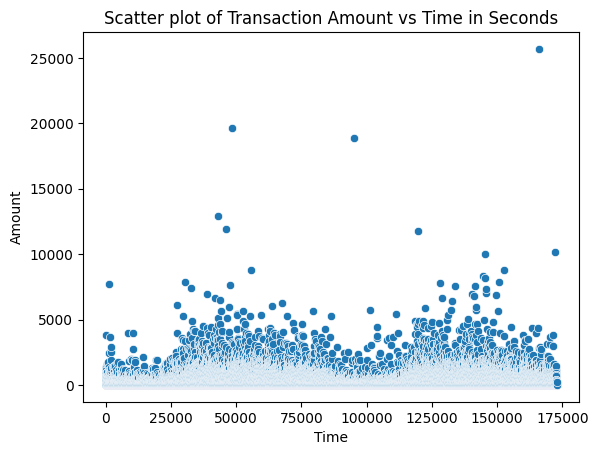

In [11]:
sns.scatterplot(data=df, x=df['Time'], y=df['Amount'])
plt.title('Scatter plot of Transaction Amount vs Time in Seconds')
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

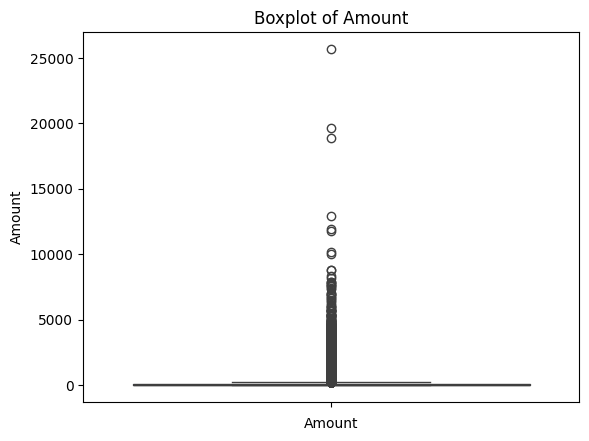

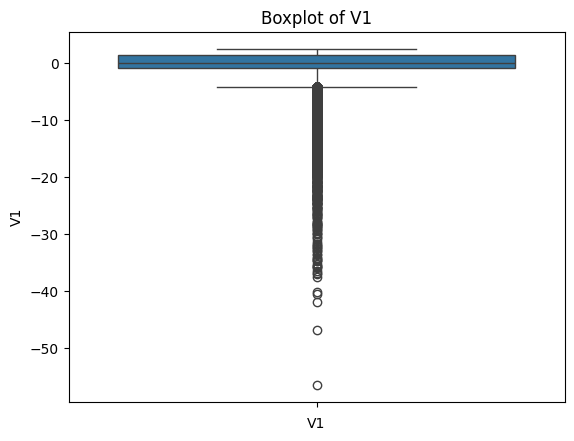

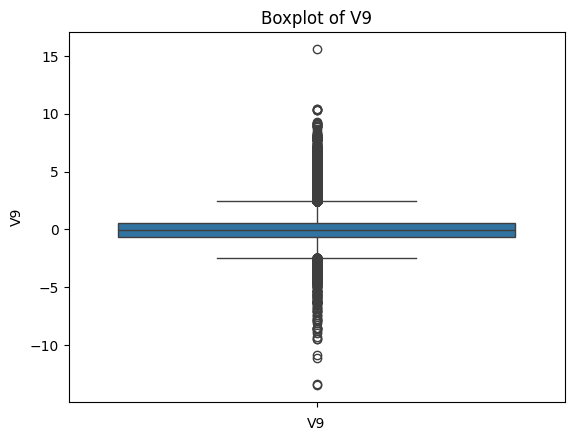

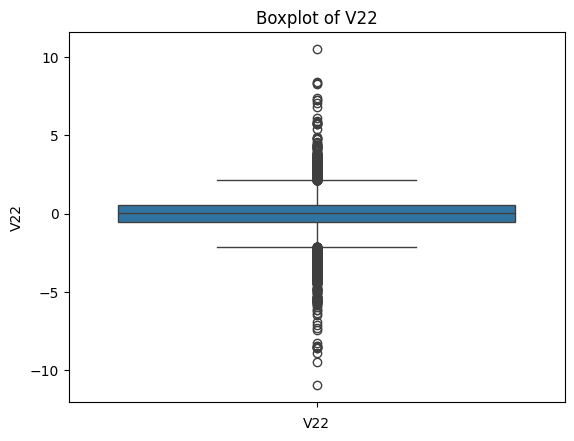

In [12]:
# Boxplot of Amount and 3 random features

features = ['Amount', 'V1', 'V9', 'V22']

for feature in features:
    sns.boxplot(df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)
    plt.show()

From the boxplot above we see alot of outliers. The data for all features starting with V has already been scaled with PCA transformation for confidentiality. 

### Class Imbalance Check

In [13]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

#### Splitting into train and test / resampling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample

In [15]:
# majority and minority class 
majority_class = df[df['Class']==0]
minority_class = df[df['Class']==1]

In [16]:
# minoirty upsample
minority_upsampled = resample(
    minority_class,
    replace=True,
    n_samples=len(majority_class),
    random_state=42
)

# join dataframes
data_upsampled = pd.concat([majority_class, minority_upsampled])

# shuffle the dataset
data_upsampled = data_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [17]:
# Class imbalance check again
data_upsampled['Class'].value_counts()

Class
1    283253
0    283253
Name: count, dtype: int64

In [31]:
data_upsampled.shape

(566506, 31)

In [18]:
# Split data into features and target

X = data_upsampled.drop(columns='Class')
y = data_upsampled['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [20]:
# models 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score, classification_report, roc_auc_score

In [21]:
# Train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
lr_y_pred = log_reg.predict(X_test)
lr_y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, lr_y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, lr_y_pred_proba))
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56651
           1       0.96      0.92      0.94     56651

    accuracy                           0.94    113302
   macro avg       0.94      0.94      0.94    113302
weighted avg       0.94      0.94      0.94    113302

ROC-AUC Score:
0.9768971793238661


Confusion Matrix:
[[54553  2098]
 [ 4802 51849]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
rf_y_pred_proba = rf.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_y_pred_proba))
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56651

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

ROC-AUC Score: 1.0


Confusion Matrix:
[[56645     6]
 [    0 56651]]


In [23]:
# lgbm model 

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

lgbm_y_pred = lgbm.predict(X_test)
lgbm_y_pred_proba = lgbm.predict_proba(X_test)[:,1]

print("Classification Report: ")
print(classification_report(y_test, lgbm_y_pred))
print("Roc-Auc Score: ")
print(roc_auc_score(y_test, lgbm_y_pred_proba))
print("\n")
print("Confusion Matrx: ")
print(confusion_matrix(y_test, lgbm_y_pred))

[LightGBM] [Info] Number of positive: 226602, number of negative: 226602
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 453204, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56651

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

Roc-Auc Score: 
0.9999580537817333


Confusion Matrx: 
[[56633    18]
 [    0 56651]]


In [25]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
knn_y_pred_proba = knn.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, knn_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, knn_y_pred_proba))
print("\n")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, knn_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56651

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

ROC-AUC Score: 0.9998234806093449


Confusion Matrix: 
[[56560    91]
 [    0 56651]]


In [26]:
# Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_y_pred = nb.predict(X_test)
nb_y_pred_proba = nb.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, nb_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, nb_y_pred_proba))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, nb_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     56651
           1       0.99      0.76      0.86     56651

    accuracy                           0.88    113302
   macro avg       0.90      0.88      0.87    113302
weighted avg       0.90      0.88      0.87    113302

ROC-AUC Score: 0.9675699018570852
Confusion Matrix: 
[[56118   533]
 [13610 43041]]


In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define a simple neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stop])

Epoch 1/50
5666/5666 [==============================] - 13s 2ms/step - loss: 23.0977 - accuracy: 0.7329 - val_loss: 2.8300 - val_accuracy: 0.9184
Epoch 2/50
5666/5666 [==============================] - 11s 2ms/step - loss: 6.4880 - accuracy: 0.8502 - val_loss: 35.5800 - val_accuracy: 0.5157
Epoch 3/50
5666/5666 [==============================] - 11s 2ms/step - loss: 4.5358 - accuracy: 0.8839 - val_loss: 1.5060 - val_accuracy: 0.8966
Epoch 4/50
5666/5666 [==============================] - 12s 2ms/step - loss: 3.0945 - accuracy: 0.9005 - val_loss: 1.3073 - val_accuracy: 0.9413
Epoch 5/50
5666/5666 [==============================] - 11s 2ms/step - loss: 2.3083 - accuracy: 0.9066 - val_loss: 0.6803 - val_accuracy: 0.9352
Epoch 6/50
5666/5666 [==============================] - 10s 2ms/step - loss: 1.1192 - accuracy: 0.9073 - val_loss: 1.1440 - val_accuracy: 0.9264
Epoch 7/50
5666/5666 [==============================] - 8s 1ms/step - loss: 0.7597 - accuracy: 0.9147 - val_loss: 1.9029 - val_a

In [30]:
# Predict
nn_y_pred_proba = model.predict(X_test).ravel()
nn_y_pred = (nn_y_pred_proba > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, nn_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, nn_y_pred_proba))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, nn_y_pred))

3541/3541 [==============================] - 3s 906us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56651
           1       0.97      0.92      0.95     56651

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302

ROC-AUC Score: 0.9858980390939777
Confusion Matrix: 
[[55185  1466]
 [ 4497 52154]]


## Conclusion

## Conclusion

Based on the performance of various models used for fraud detection, the following insights were observed:

### 1. **Logistic Regression**
- Achieved an accuracy of 94%, with a high ROC-AUC score of 0.977. 
- The model performed well with a good balance between precision and recall, showcasing its ability to detect fraud efficiently.

### 2. **Random Forest**
- Reached an accuracy of 100%, with a perfect ROC-AUC score of 1.0.
- The model showed exceptional performance, correctly classifying both fraudulent and non-fraudulent transactions, with no false negatives.

### 3. **LightGBM**
- Also achieved 100% accuracy, with an outstanding ROC-AUC score of 0.99996.
- This model demonstrated excellent prediction accuracy and is a strong contender for fraud detection tasks.

### 4. **K-Nearest Neighbors (KNN)**
- Achieved a perfect classification result, with a ROC-AUC score of 0.99982.
- It performed similarly to the Random Forest and LightGBM models, correctly identifying fraudulent transactions.

### 5. **Gaussian Naive Bayes**
- The model showed an accuracy of 88% with a ROC-AUC score of 0.9675.
- Although this model performed well, its accuracy and ability to detect fraudulent cases were lower than the other models.

### **Overall Performance**
- **Random Forest**, **LightGBM**, and **KNN** models achieved perfect accuracy and high ROC-AUC scores, making them the most effective models for fraud detection in this case.
- **Logistic Regression** and **Gaussian Naive Bayes** also performed well, with Logistic Regression achieving strong results in precision and recall, and Gaussian Naive Bayes showing a more modest performance.

### **Recommendation**
- Given the high accuracy and perfect classification performance of Random Forest, LightGBM, and KNN, these models should be prioritized for fraud detection applications.
- Further model tuning and real-world validation could further improve the detection of anomalies, especially in more complex datasets.
